In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

/Users/rajith/anaconda3/anaconda3/envs/tensorflow/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/rajith/anaconda3/anaconda3/envs/tensorflow/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
num_house = 60
np.random.seed(42)
house_size = np.random.randint(low=1000,high=3500,size=num_house)

np.random.seed(42)
house_price = house_size*100.0+np.random.randint(low=20000,high=70000,size=num_house)

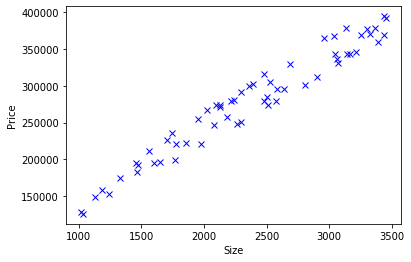

In [3]:
plt.plot(house_size,house_price,"bx")
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()